In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


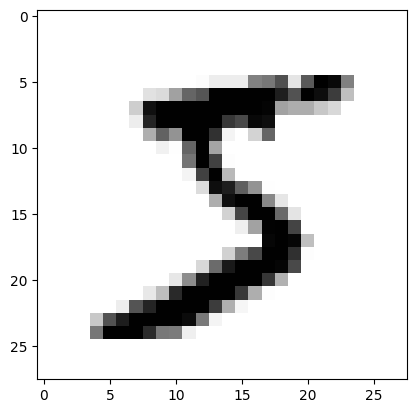

In [ ]:
plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [ ]:
x_train = x_train/ 255
x_test = x_test/ 255

In [ ]:
print(np.max(x_train[0]))

1.0


In [ ]:
print(x_train[0].shape)

(28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [ ]:
# Autoencoder model:

class Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim, n_neurons, enc_layers, dec_layers):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.n_neurons = n_neurons

        # Bottleneck issue check
        if not (latent_dim * 4 <= n_neurons <= latent_dim * 8):
            raise Exception("Bottleneck issue, reassign the number of neurons!")

        self.flatten = tf.keras.layers.Flatten()

        # Encoder layers
        self.encoder_layers = []
        for _ in range(enc_layers):
            self.encoder_layers.append(tf.keras.layers.Dense(n_neurons, activation='relu'))

        # Bottleneck layers
        self.bottleneck1 = tf.keras.layers.Dense(latent_dim * 4, activation='relu')
        self.bottleneck2 = tf.keras.layers.Dense(latent_dim * 2, activation='relu')
        self.latent = tf.keras.layers.Dense(latent_dim, activation='relu')

        # Decoder layers
        self.decoder_layers = []
        for _ in range(dec_layers):
            self.decoder_layers.append(tf.keras.layers.Dense(n_neurons, activation='relu'))

        # Output layer
        self.output_layer = tf.keras.layers.Dense(28 * 28, activation='sigmoid')
        self.reshape_layer = tf.keras.layers.Reshape((28, 28, 1))

    def call(self, inputs):
        x = self.flatten(inputs)

        # Pass through encoder layers
        for layer in self.encoder_layers:
            x = layer(x)

        # Bottleneck
        x = self.bottleneck1(x)
        x = self.bottleneck2(x)
        x = self.latent(x)

        # Pass through decoder layers
        for layer in self.decoder_layers:
            x = layer(x)

        # Output layer and reshape to original input dimensions
        x = self.output_layer(x)
        x = self.reshape_layer(x)

        return x

In [ ]:
# Example Usage:
model = Autoencoder(latent_dim=32, n_neurons=128, enc_layers=2, dec_layers=2)
#model.build(input_shape=(None, 28, 28, 1))
#model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(x_train, x_train, epochs = 10, batch_size = 32, validation_data= (x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0536 - val_loss: 0.0208
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0197 - val_loss: 0.0162
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0158 - val_loss: 0.0141
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0138 - val_loss: 0.0123
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0125 - val_loss: 0.0115
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0108 - val_loss: 0.0101
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0096 - val_loss: 0.0092


In [ ]:
# evaluating the results:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


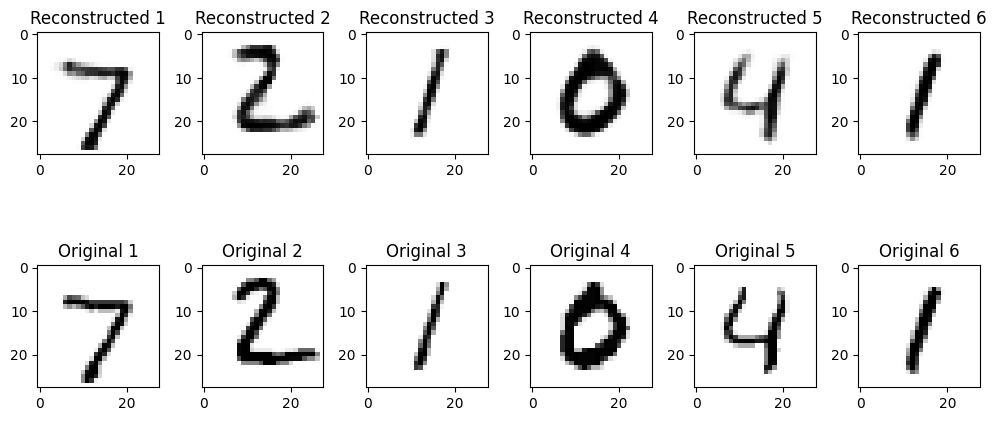

In [ ]:
# Generating and comparing images
fig, axes = plt.subplots(2, 6, figsize=(10, 5))

# Plot reconstructed images
for i in range(6):
    axes[0, i].imshow(predictions[i].squeeze(), cmap='binary')
    axes[0, i].set_title(f"Reconstructed {i+1}")
#    axes[0, i].axis('off')  # Hide axes

# Plot original images
for i in range(6):
    axes[1, i].imshow(x_test[i].squeeze(), cmap='binary')
    axes[1, i].set_title(f"Original {i+1}")
#    axes[1, i].axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()